In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df=pd.read_csv('updated.csv')
print("Max :",np.max(df['time_elapsed'].value_counts()))
print("Min :",np.min(df['time_elapsed'].value_counts))

Max : 59
Min : <bound method IndexOpsMixin.value_counts of 0            0
1            1
2            2
3            4
4            5
          ... 
104404    6142
104405    6142
104406    6142
104407    6142
104408    6142
Name: time_elapsed, Length: 104409, dtype: int64>


In [14]:
df.columns

Index(['year', 'month', 'day', 'latitude', 'longitude', 'zon.winds',
       'mer.winds', 'humidity', 'air temp.', 's.s.temp.', 'time_elapsed'],
      dtype='object')

In [15]:
X_train=df[df['time_elapsed']<=5000].drop(columns='s.s.temp.')
X_test=df[df['time_elapsed']>5000].drop(columns=['s.s.temp.'])

y_train=df[df['time_elapsed']<=5000]['s.s.temp.']
y_test=df[df['time_elapsed']>5000]['s.s.temp.']

In [16]:
# Tranformers

from sklearn.preprocessing import FunctionTransformer,StandardScaler,PowerTransformer

yeojohnson_transformer=PowerTransformer(method='yeo-johnson')
X_train['zon.winds']=yeojohnson_transformer.fit_transform(X_train[['zon.winds']])
X_test['zon.winds']=yeojohnson_transformer.transform(X_test[['zon.winds']])

'''log_tranformer=FunctionTransformer(np.log1p,validate=True)
X_train['air temp.']=log_tranformer.fit_transform(X_train[['air temp.']])
X_test['air temp.']=log_tranformer.transform(X_test[['air temp.']])'''

X_train['air temp.']=yeojohnson_transformer.fit_transform(X_train[['air temp.']])
X_test['air temp.']=yeojohnson_transformer.transform(X_test[['air temp.']])

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

c:\Users\Dell\anaconda3_original\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


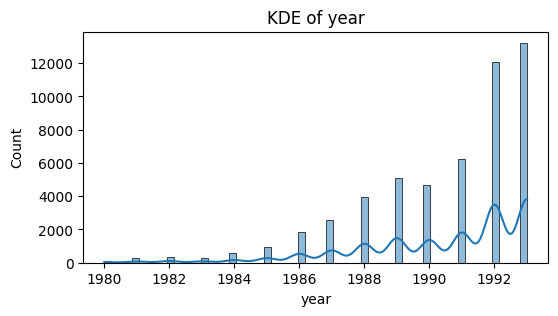

c:\Users\Dell\anaconda3_original\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


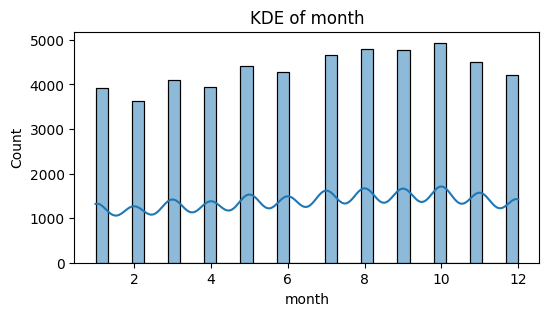

c:\Users\Dell\anaconda3_original\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


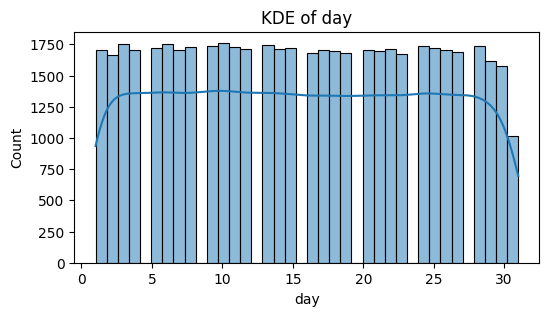

c:\Users\Dell\anaconda3_original\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


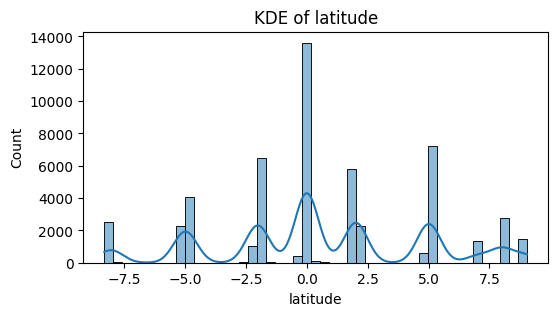

c:\Users\Dell\anaconda3_original\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


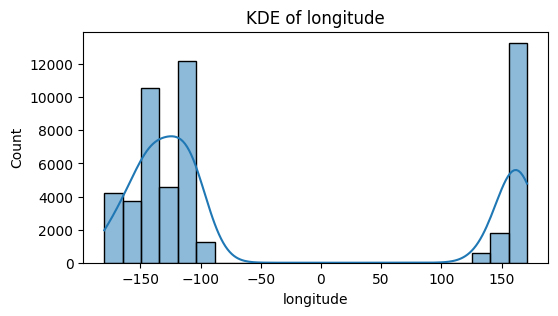

c:\Users\Dell\anaconda3_original\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


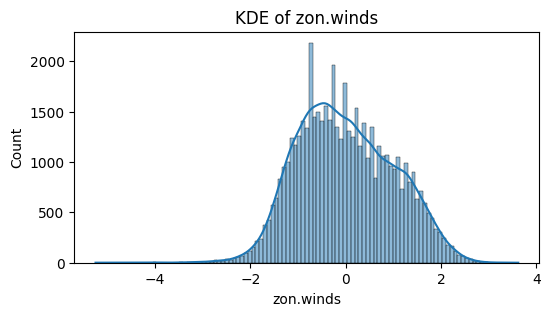

c:\Users\Dell\anaconda3_original\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


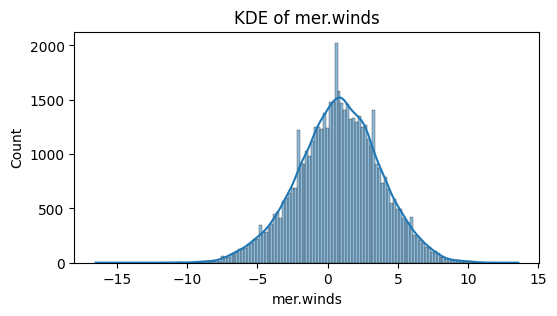

c:\Users\Dell\anaconda3_original\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


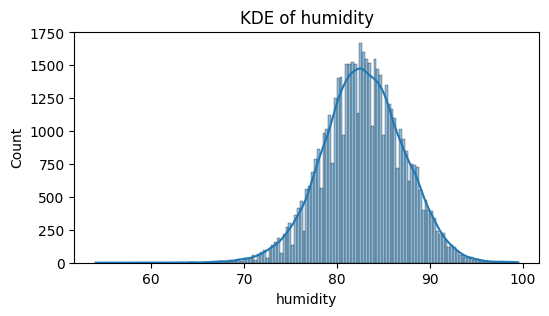

c:\Users\Dell\anaconda3_original\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


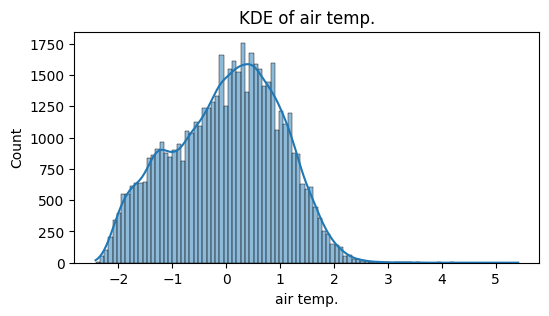

c:\Users\Dell\anaconda3_original\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


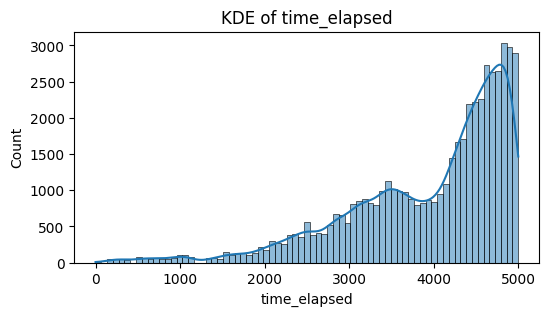

In [17]:
columns=(df.drop(columns=['s.s.temp.'])).columns
for col in columns:
    plt.figure(figsize=(6,3))
    sns.histplot(x=col,kde=True,data=X_train)
    plt.title(f"KDE of {col}")
    plt.xlabel(f"{col}")
    plt.show()

In [18]:
from sklearn.model_selection import GridSearchCV,TimeSeriesSplit
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error

xgb_param_grid={
    'learning_rate':[0.01,0.05,0.1],
    'max_depth':[2,3,4],
    'n_estimators':[230,250,270]
}
xgb_model=XGBRegressor()
xgb_grid_search=GridSearchCV(
    estimator=xgb_model,
    param_grid=xgb_param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1
)
xgb_grid_search.fit(X_train,y_train)
xgb_best_params=xgb_grid_search.best_params_
xgb_best_model=XGBRegressor(**xgb_best_params)
xgb_best_model.fit(X_train,y_train)
y_pred_xgb=xgb_best_model.predict(X_test)
mse_xgb=mean_squared_error(y_test,y_pred_xgb)
r_2_xgb=r2_score(y_test,y_pred_xgb)

print(f"MSE:{mse_xgb}")
print(f"R2 Score:{r_2_xgb}")
print(f"XGB best params:{xgb_best_params}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
MSE:0.4277728582959395
R2 Score:0.9055767208998897
XGB best params:{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 250}


In [19]:
from sklearn.model_selection import GridSearchCV,TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model=RandomForestRegressor()
rf_grid_search=GridSearchCV(
    estimator=rf_model,
    param_grid=rf_param_grid,
    verbose=1,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

rf_grid_search.fit(X_train,y_train)
rf_best_params=rf_grid_search.best_params_
rf_best_model=RandomForestRegressor(**rf_best_params)
rf_best_model.fit(X_train,y_train)
y_pred_rf=rf_best_model.predict(X_test)
mse_rf=mean_squared_error(y_test,y_pred_rf)
r_2_rf=r2_score(y_test,y_pred_rf)

print(f"MSE:{mse_rf}")
print(f"R2 Score:{r_2_rf}")
print(f"Random forest best params:{rf_best_params}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
MSE:0.35084674176319264
R2 Score:0.9225567981315174
Random forest best params:{'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 300}
